In [1]:
import geopandas as gpd
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm
import time
import xarray as xr

/home/luckyw0w/.local/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("Results/anomaly_df.csv") #read saved mandal anomalies data from Notebook 5

points = pd.read_csv('../Temperature Anomalies/Results/telacoords.csv')

points['res'] = list(df['0'])

import xarray as xr
import rioxarray

da = points.set_index(['latitude', 'longitude']).to_xarray()

# promote the data variables model lat/long to 2d coordinates
da = da.set_coords(['latitude', 'longitude'])

da.res.rio.to_raster('sample_raster.tif')


import georasters as gr
elevation = gr.from_file('sample_raster.tif')
elevation = elevation.to_geopandas()

months = pd.date_range('1950-01-01','2022-07-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()



df = df.T

df['Dates'] = pd.to_datetime(months)
DateOrdinal = [dt.datetime.toordinal(i) for i in df['Dates']]

def Trend_score(df, DateOrdinal, i):

    sdf = pd.Series(list(df[i]), index=pd.to_datetime(df['Dates']), name="TempAnomaly")
    stl = STL(sdf)
    res = stl.fit()
    #Set the data in the right format for Linear Regression
    x = np.array(DateOrdinal)
    X = x.reshape(-1, 1)
    y = np.array(res.trend)
    y = y.reshape(-1, 1)

    #Perform Linear Regression and obtain the slope
    reg = LinearRegression().fit(X, y)
    y_pred_trend = reg.predict(X)
    slope, intercept = np.polyfit(x, y_pred_trend,1)
    
    return slope[0]

slopes = [Trend_score(df, DateOrdinal, i) for i in df.columns[:-1]]

res = np.array(slopes)
data_norm = np.where(res >= 0, res/np.max(res), -res/np.min(res))

deviance = gpd.GeoDataFrame()
deviance['deviance'] = data_norm
deviance['geometry'] = elevation['geometry']

deviance.to_file('rainfall_anomaly_deviance.json')

In [242]:
df = pd.read_csv("mandalanomalies.csv")

In [243]:
df.head(2)
#df = df.T

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,863,864,865,866,867,868,869,870,mandals,geometry
0,0,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,Abdullapurmet,POLYGON ((78.58558260100006 17.346747761000074...
1,1,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,Achampet,POLYGON ((79.06269374200008 16.446068728000057...


In [244]:
#coords = pd.read_csv("telcoords.csv")

#for districts & mandals

coords = df[["mandals","geometry"]]

In [245]:
df = df.drop(["mandals","geometry"], axis=1)
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
Unnamed: 0,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,582.00,583.00,584.00,585.00,586.00,587.00,588.00,589.00,590.00,591.00
0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
1,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
3,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
867,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
868,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
869,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


In [246]:
data_len = len(df.columns)
data_len

592

In [247]:
df = df.reset_index()

In [248]:
## Use if Index not coming properly
index = []
for i in range (0,len(df)):
    index.append(i)
    
df["index"] = index

In [249]:
#Applying row wise linear regression to find slope. Hence, finding deviances
scores = []

for i in range(0,data_len):
    
    X = np.array(df['index'])
    #print(X)
    X = X.reshape(-1, 1)
    #print(X)
    #i = str(i)
    #print(df[i])
    y = np.array(df[i])
    y = y.reshape(-1, 1)

    #Perform Linear Regression and obtain the slope
    reg = LinearRegression().fit(X, y)
    y_pred_trend = reg.predict(X)
    slope, intercept = np.polyfit(np.array(df['index']), y_pred_trend,1)
    line_slope = slope[0]
    
    scores.append(line_slope)

In [250]:
len(scores)

592

In [251]:
df = df.drop("index", axis = 1)

In [252]:
df = df.T

In [253]:
df["deviance"] = scores

In [254]:
df

,0,1,2,3,4,5,6,7,8,9,...,863,864,865,866,867,868,869,870,871,deviance
0,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
1,1.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
2,2.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
3,3.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
4,4.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,587.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,-0.00,...,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
588,588.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,-0.00,...,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
589,589.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
590,590.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00


In [256]:
# Use these for Telangana
#df["latitude"] = list(coords["latitude"])
#df["longitude"] = list(coords["longitude"])

#For districts and mandals 
df["geometry"]=coords["geometry"]
df["mandal"]= coords["mandals"]
df = df[["mandal","deviance","geometry"]]

In [257]:
#For state level data
'''import rioxarray                             
df2 = df[['latitude','longitude']]
df2['value'] = list(df['deviance'])
da = df2.set_index(['latitude', 'longitude']).to_xarray()
da = da.set_coords(['latitude', 'longitude'])
da.rio.to_raster('TelanganaPrecipitationAnomaly.tif')'''

"import rioxarray                             \ndf2 = df[['latitude','longitude']]\ndf2['value'] = list(df['deviance'])\nda = df2.set_index(['latitude', 'longitude']).to_xarray()\nda = da.set_coords(['latitude', 'longitude'])\nda.rio.to_raster('TelanganaPrecipitationAnomaly.tif')"

In [258]:
import gemgis as gg
# For Mandal data and Districts
from shapely import wkt

df["geometry"] = df['geometry'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df[["mandal","deviance"]], geometry=df["geometry"], crs=4326)

In [259]:
gdf.to_file("mandaldeviances.geojson", driver="GeoJSON")

## Plotting State dataa

In [260]:
from osgeo import gdal
import matplotlib.pyplot as plt
from osgeo import osr
spatref = osr.SpatialReference()
spatref.ImportFromEPSG(4326)
crs_wkt = spatref.ExportToWkt()

dataset = gdal.Open('TelanganaPrecipitationAnomal.tif', gdal.GA_ReadOnly) 
dataset.SetProjection(crs_wkt)
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()

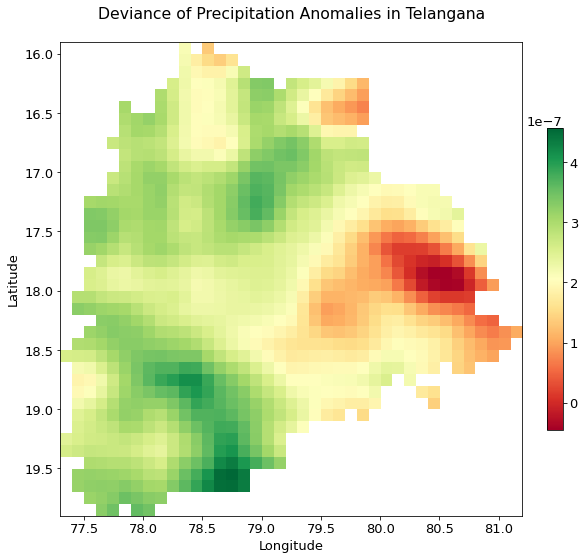

In [275]:
geotransform = dataset.GetGeoTransform()

originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotransform
cols =  dataset.RasterXSize
rows =  dataset.RasterYSize

projection = dataset.GetProjection()

finalX = originX + pixelWidth * cols
originY = finalY + pixelHeight * rows

extentArray = [originX,finalX,originY,finalY]

plt.figure(figsize=(9,9))

im = plt.imshow(arr, cmap= "RdYlGn", extent=extentArray, origin="lower")
plt.colorbar(im, fraction=0.03)
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

plt.rcParams.update({'font.size': 13})
plt.title("Deviance of Precipitation Anomalies in Telangana\n")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
print(" ")
plt.show()

## Plotting Mandal and District level data

In [263]:
gdf = gpd.read_file("mandaldeviances.geojson")

In [264]:
gdf[gdf==0] = np.nan

In [271]:
gdf = gdf.drop("index", axis = 1)

In [272]:
gdf = gdf.reset_index()

<AxesSubplot:title={'center':'Deviance in Precipitation Anomalies at District level\n'}, xlabel='Longitude', ylabel='Latitude'>

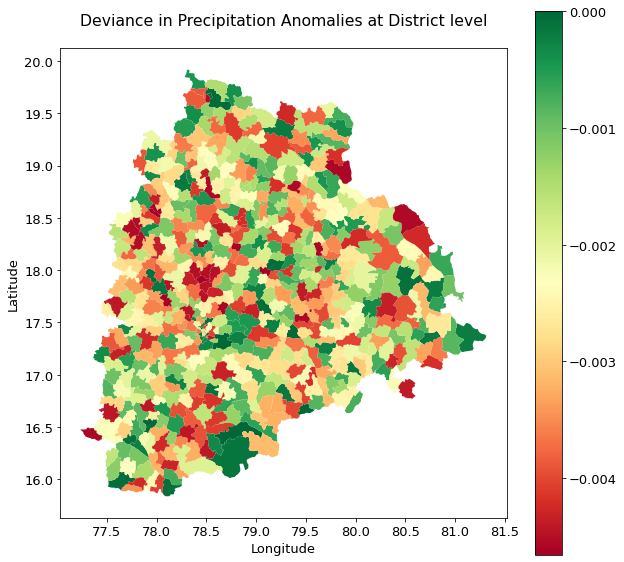

In [273]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,10))

plt.rcParams.update({'font.size': 13})
plt.title("Deviance in Precipitation Anomalies at District level\n")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
gdf.plot(column="deviance", ax=ax, legend=True, cmap="RdYlGn")